In [34]:
pwd

'/content/drive/My Drive'

In [ ]:
ls

In [ ]:
cd drive/MyDrive/

In [4]:
import tensorflow

In [ ]:
tensorflow.__version__

In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


# importing tensoflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [ ]:
# load the data
!ls

In [9]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.info()

In [12]:
# split into dependent and independ varibales
X = df.iloc[: , 3:13]
y = df.iloc[: , 13]

In [ ]:
X.info()

In [14]:
# on hot encoding
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first= True)

In [ ]:
geography

In [15]:
# merging to df
X = pd.concat([X ,geography, gender], axis = 1)

In [17]:
# dropping the 
X = X.drop(columns=['Geography','Gender'], axis = 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,   test_size = 0.2, random_state = 101)

In [21]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
6861,605,41,5,103154.66,1,0,0,143203.78,0,1,1
9881,687,40,1,0.00,2,1,0,8207.36,0,1,0
4536,642,55,7,0.00,2,1,1,101515.76,0,0,0
8430,612,38,7,110615.47,1,1,1,193502.93,0,0,0
6765,461,40,7,0.00,2,1,0,176547.80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
599,484,34,4,148249.54,1,0,1,33738.27,1,0,0
5695,787,46,7,117685.31,2,1,1,93360.35,0,0,1
8006,716,41,8,126145.54,2,1,1,138051.19,1,0,1
1361,578,32,4,0.00,2,1,1,141822.80,0,0,1


In [24]:
# feature scaling
sc= StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

# model building and training is always done in 3 phase

1. model architecture
2. model compilation
3. model fit (training the model)

In [31]:
# creation of model
model = Sequential(
    [
     Dense(100, activation='sigmoid'),  # hidden layer 1

     Dense(50 , activation='relu' , kernel_initializer='he_uniform'),  # hidden layer 2

     Dense(25, activation='sigmoid'),  # hidden layer 3

     Dense(1 , activation='sigmoid')
    ]
)

In [ ]:
# important link for optimizers - https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

# github - https://github.com/Afsaan/Keras-tuner/blob/master/keras_tuner_ANN.py

In [48]:
# model compilation
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
X_train.shape

In [50]:
# model training
history = model.fit(X_train, y_train, epochs = 100 , batch_size = 32, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8656 - val_loss: 0.3422 - val_accuracy: 0.8612
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8647 - val_loss: 0.3401 - val_accuracy: 0.8644
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8658 - val_loss: 0.3362 - val_accuracy: 0.8687
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8673 - val_loss: 0.3389 - val_accuracy: 0.8681
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8661 - val_loss: 0.3475 - val_accuracy: 0.8612
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8689 - val_loss: 0.3494 - val_accuracy: 0.8550
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8675 - val_loss: 0.3485 - val_accuracy: 0.8606

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

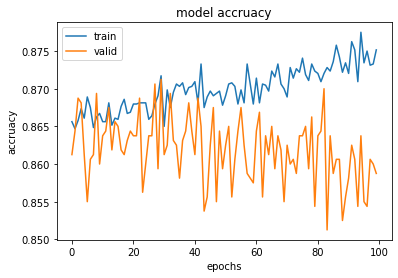

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.title('model accruacy')
plt.ylabel('accruacy')
plt.xlabel('epochs')
plt.legend()
plt.show()



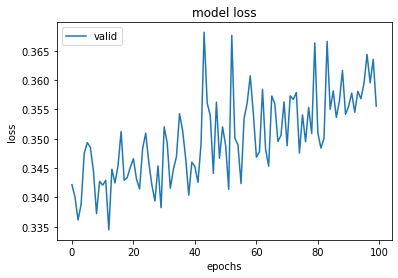

In [94]:
# plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

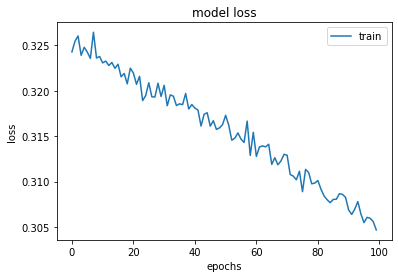

In [93]:
plt.plot(history.history['loss'], label = 'train')
# plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

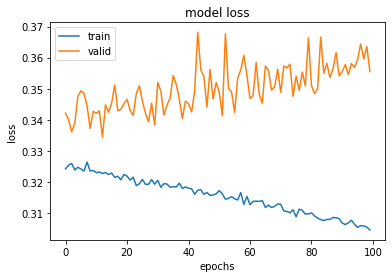

In [95]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
# hyperparemter tuning

- number of hidden layers
- units
- activation
- kernel init
- optimizer
- loss
- epochs
- batch_size

In [73]:
# tesing the model

y_pred = model.predict(X_test )
y_pred_prob = (y_pred >= 0.7)
y_pred_prob

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [74]:
y_pred

array([[0.07066891],
       [0.02244675],
       [0.8362652 ],
       ...,
       [0.01596341],
       [0.1594196 ],
       [0.68644917]], dtype=float32)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
confusion_matrix(y_pred_prob , y_test)

array([[1544,  255],
       [  33,  168]])

In [77]:
accuracy_score(y_pred_prob , y_test)

0.856

In [92]:
# saving
model.save('churn_model.h5')

joblib.dump(sc , 'feature_scaling_model.pkl')

['feature_scaling_model.pkl']

In [80]:
ls

 churn_model.h5             feature_scaling_model.pkl   ppts/
 Churn_Modelling.csv        learnbay/                   Presentation/
'Colab Notebooks'/         'learnbay classes'/         'Project session.gsheet'
'computer backup'/          model/                     'upwork project'/
'Data science facts.gdoc'   Payement.gsheet


In [81]:
from tensorflow.keras.models import load_model

In [89]:
ls

 churn_model.h5             feature_scaling_model.pkl   ppts/
 Churn_Modelling.csv        learnbay/                   Presentation/
'Colab Notebooks'/         'learnbay classes'/         'Project session.gsheet'
'computer backup'/          model/                     'upwork project'/
'Data science facts.gdoc'   Payement.gsheet


In [82]:
loaded_model = load_model('churn_model.h5')

In [90]:
sc  = joblib.load('feature_scaling_model.pkl')
data = sc.transform([[5,2,1,100,1,1,1,8,1,1,9]])
a = loaded_model.predict(data)
a[0] > 0.7

array([False])

In [86]:
a = (a[0] > 0.7)[0]

False

In [ ]:
if a == false:
  print('he will not leave')
else:
  print('he will lrave')

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________
